# **Aula 13 - DDS4 - Machine Learning com PyCaret**

## **DADOS DE CUSTOS MÉDICOS**

In [ ]:
#instalar pycaret

In [ ]:
from pycaret.datasets import get_data
dados = get_data('insurance') 

In [32]:
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


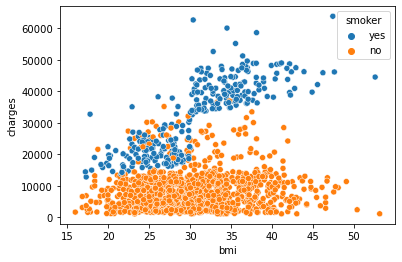

In [2]:
import seaborn as sns
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

---

## **Objetivo Primário: construir um bom modelo para previsão dos custos médicos de uma pessoa**

In [3]:
import pycaret.regression as pyreg 

In [7]:
?pyreg.setup

In [8]:
# setup
regressao = pyreg.setup(data = dados, target = 'charges', 
                       combine_rare_levels = True,
                       normalize = True)

,Description,Value
0,session_id,8692
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [28]:
pyreg.models().shape

(25, 3)

In [10]:
rf = pyreg.create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2600.7236,22177959.0048,4709.3480,0.8787,0.4376,0.2709
1,3238.8248,33002628.7175,5744.7914,0.7883,0.5747,0.4014
2,2749.7326,27358699.8775,5230.5545,0.7503,0.4544,0.3065
3,3182.3126,29419253.0619,5423.9518,0.8000,0.4847,0.3553
4,2684.4980,24691309.2758,4969.0350,0.8380,0.4229,0.3445
5,3493.2280,35962696.4986,5996.8906,0.8236,0.4705,0.3135
6,3398.9578,36818076.6213,6067.7901,0.7412,0.6204,0.4178
7,2236.6919,13253468.8691,3640.5314,0.9051,0.4678,0.4179
8,2524.4009,18330232.9019,4281.3821,0.8175,0.4343,0.3620
9,3201.0646,28977697.6129,5383.0937,0.7833,0.5811,0.4269


In [12]:
rf_tunado = pyreg.tune_model(rf, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2041.5801,19858816.2562,4456.3232,0.8913,0.4256,0.1769
1,2763.6570,32900702.6042,5735.9134,0.7890,0.5074,0.2429
2,1985.6441,24768436.2202,4976.7898,0.7739,0.3905,0.1637
3,2159.5718,24017435.1130,4900.7586,0.8367,0.3775,0.1598
4,1891.4574,19516793.0553,4417.7815,0.8719,0.3264,0.1882
5,2738.6347,32424367.0680,5694.2398,0.8410,0.4191,0.1639
6,2628.9122,32333158.4017,5686.2253,0.7727,0.5371,0.2207
7,1288.6570,7826370.6119,2797.5651,0.9439,0.2447,0.1373
8,1642.3197,14989313.1400,3871.6034,0.8508,0.2827,0.1469
9,2198.3567,25347699.1843,5034.6499,0.8105,0.5063,0.1984


In [13]:
# Comparando os modelos implementados, ordenando pelo RMSLE
melhores = pyreg.compare_models(sort = 'RMSLE', n_select = 15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2713.8648,23454162.2261,4776.3283,0.8373,0.4558,0.3323,0.0190
par,Passive Aggressive Regressor,3799.1062,54603564.6560,7332.0291,0.6298,0.4889,0.1930,0.0130
huber,Huber Regressor,3584.6615,50945288.1042,7072.2974,0.6437,0.4899,0.2217,0.0070
rf,Random Forest Regressor,2931.0435,26999202.2441,5144.7369,0.8126,0.4948,0.3617,0.0890
catboost,CatBoost Regressor,2894.7198,25876455.7977,5028.4897,0.8210,0.5004,0.3595,0.8690
et,Extra Trees Regressor,2933.8834,30320604.2766,5467.0815,0.7897,0.5074,0.3506,0.0790
dt,Decision Tree Regressor,3378.3543,48427233.8537,6917.5620,0.6607,0.5524,0.3845,0.0060
lightgbm,Light Gradient Boosting Machine,3066.4640,26218211.8979,5063.0648,0.8189,0.5565,0.3890,0.0430
xgboost,Extreme Gradient Boosting,3245.4514,30321848.0000,5429.9530,0.7901,0.5902,0.4232,0.1910
knn,K Neighbors Regressor,5184.1053,66431486.0000,8082.2934,0.5501,0.5960,0.5043,0.0060


In [14]:
melhores

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8692, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                            epsilon=0.1, fit_intercept=True,
                            loss='epsilon_insensitive', max_iter=1000,
                            n_iter_no_change=5, random_state=8692, shuffle=True,
                            tol=0.001, 

In [16]:
melhores_tunados = []

for i in range(len(melhores)):
    melhores_tunados.append(pyreg.tune_model(melhores[i], optimize = 'RMSLE'))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4254.4416,32113758.7149,5666.9003,0.8243,0.5043,0.4467
1,4811.5485,51586267.3613,7182.3581,0.6692,0.7411,0.4042
2,4336.0490,37973152.5551,6162.2360,0.6534,0.6619,0.4968
3,4236.6934,37275378.3056,6105.3565,0.7465,0.5547,0.3943
4,4119.0392,38714806.8251,6222.1224,0.7460,0.5689,0.4829
5,5646.3330,58751369.3780,7664.9442,0.7119,0.5021,0.3985
6,4308.4099,41956756.4403,6477.4035,0.7050,0.6638,0.4037
7,3900.7956,26178854.3284,5116.5276,0.8125,0.4890,0.4679
8,3844.1336,29484286.7516,5429.9435,0.7065,0.5701,0.4069
9,4599.3922,42597593.7457,6526.6832,0.6815,0.7003,0.4696


In [17]:
for i in range(len(melhores_tunados)):
    ccc = pyreg.predict_model(melhores_tunados[i]) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2410.9817,15261029.9411,3906.5368,0.8917,0.4197,0.3679


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Passive Aggressive Regressor,3074.7620,35548087.2864,5962.2217,0.7477,0.3955,0.1942


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,3051.0696,37552055.7769,6127.9732,0.7335,0.3830,0.2009


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1734.4965,14618861.9105,3823.4620,0.8963,0.3338,0.1900


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,2470.4198,15808887.3544,3976.0392,0.8878,0.4313,0.3756


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1828.9710,15819047.6121,3977.3166,0.8877,0.3024,0.1518


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,1650.8437,15878658.4621,3984.8034,0.8873,0.3353,0.1497


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2901.7450,18142491.2327,4259.4003,0.8712,0.4564,0.3985


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,3153.6147,20843080.0000,4565.4224,0.8521,0.5615,0.4929


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,5053.3012,59937816.3375,7741.9517,0.5746,0.5946,0.6259


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,4013.2915,31541778.0000,5616.2070,0.7761,0.5188,0.4400


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,4014.6016,31532525.3565,5615.3829,0.7762,0.5168,0.4401


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,4045.5940,31671328.0000,5627.7285,0.7752,0.4976,0.4461


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,3190.3186,18975945.0562,4356.1388,0.8653,0.5436,0.5629


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,4013.2954,31541786.8957,5616.2075,0.7761,0.5188,0.4400


In [20]:
combinado9 = pyreg.blend_models(melhores_tunados[:9])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2467.4111,21553139.8010,4642.5359,0.8821,0.3765,0.1911
1,3145.3176,35060677.0825,5921.2057,0.7751,0.4906,0.2598
2,2459.2792,24869205.8798,4986.9034,0.7730,0.3785,0.2014
3,2775.6409,25110942.2028,5011.0819,0.8292,0.4050,0.2340
4,2392.0294,22881656.6846,4783.4775,0.8499,0.3448,0.2333
5,3436.6883,36739636.5034,6061.3230,0.8198,0.4252,0.2283
6,3028.3453,31423925.5694,5605.7047,0.7791,0.5160,0.2652
7,1910.5525,10023799.7501,3166.0385,0.9282,0.2926,0.2153
8,2136.3247,16622093.6229,4077.0202,0.8345,0.3339,0.2216
9,2853.3325,27101672.7947,5205.9267,0.7974,0.5097,0.2728


In [21]:
et = pyreg.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2845.7371,24691990.5436,4969.1036,0.8649,0.4649,0.3070
1,3251.4249,37481283.2984,6122.1960,0.7596,0.6209,0.4503
2,2538.7222,25552226.7434,5054.9210,0.7667,0.4163,0.2498
3,3058.9976,29026066.9899,5387.5845,0.8026,0.4564,0.2833
4,2667.4748,28278556.6416,5317.7586,0.8144,0.4924,0.3948
5,3540.8398,42803407.3100,6542.4313,0.7901,0.4665,0.2841
6,3038.5525,34118085.6278,5841.0689,0.7601,0.5898,0.3208
7,2394.9907,18697003.9818,4324.0032,0.8661,0.4372,0.3609
8,2705.0780,24155280.4687,4914.8022,0.7595,0.5207,0.4576
9,3297.0163,38402141.1611,6196.9461,0.7129,0.6090,0.3973


In [23]:
et_tunado = pyreg.tune_model(et, optimize = 'RMSLE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2228.4638,21014366.3289,4584.1429,0.8850,0.3877,0.1537
1,2674.9398,34099559.2235,5839.4828,0.7813,0.4900,0.1958
2,2052.6124,24908223.2976,4990.8139,0.7726,0.3790,0.1441
3,2389.9593,25568743.7236,5056.5545,0.8261,0.3724,0.1460
4,1776.6997,19488490.1483,4414.5770,0.8721,0.3036,0.1428
5,3095.1558,37763822.2710,6145.2276,0.8148,0.4194,0.1623
6,2813.6582,33682958.8306,5803.7022,0.7632,0.5452,0.1974
7,1455.6529,9625753.5719,3102.5399,0.9311,0.2377,0.1208
8,1801.2877,17105859.7205,4135.9231,0.8297,0.2954,0.1395
9,2377.6525,27099361.0448,5205.7047,0.7974,0.4971,0.1746


ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                    max_depth=10, max_features=1.0, max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.005,
                    min_impurity_split=None, min_samples_leaf=4,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=280, n_jobs=-1, oob_score=False,
                    random_state=8692, verbose=0, warm_start=False)

In [26]:
# Performance nos dados de validacao
pred = pyreg.predict_model(et_tunado)
pred

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1828.9710,15819047.6121,3977.3166,0.8877,0.3024,0.1518


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-1.023707,-0.053026,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2632.991943,4027.213385
1,-1.523544,1.077986,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2219.445068,2957.563948
2,-0.809490,0.777840,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3268.846680,3106.580940
3,-1.237923,0.239840,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2055.324951,2234.519254
4,-0.809490,0.516525,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19673.335938,2967.352628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-1.523544,0.470411,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34617.839844,34170.719580
398,0.618618,-1.266557,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,8269.043945,9897.471347
399,0.761429,-0.399287,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10702.642578,11039.581240
400,0.332996,0.010078,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7731.427246,8460.560664


In [ ]:
pred['Label']

In [27]:
pyreg.evaluate_model(et_tunado)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
# Utilizando o modelo escolhido nos dados todos para gerar o modelo final
modelo_final = pyreg.finalize_model(et_tunado)

In [31]:
# Salvando o modelo
pyreg.save_model(modelo_final, 'meu-modelo-para-charges')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mae', max_depth=10,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_

---

In [35]:
# Deploy Básico
import pandas as pd

def CustoSeguro(age, sex, bmi, children, smoker, region):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'smoker': [smoker], 'region': [region]}
    dados = pd.DataFrame(dados0)

    modelo = pyreg.load_model('meu-modelo-para-charges')

    pred = float(pyreg.predict_model(modelo, data = dados)['Label'].round(2))
    valor = round(1.8*pred, 2)
    
    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Fumante: {}'.format(smoker))
    print('Região: {}'.format(region))
    print(' ')
    print('Custo do Seguro: ${}'.format(pred))
    print('Valor de Venda: ${}'.format(valor))


In [36]:
CustoSeguro(age = 34, sex = 'male', bmi = 30, children = 0, smoker =  'yes', region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 34
Sexo: male
IMC: 30
Crianças: 0
Fumante: yes
Região: southwest
 
Custo do Seguro: $28844.2
Valor de Venda: $51919.56


In [ ]:
CustoSeguro(45, 'female', 20, 2, 'yes', 'southwest')

In [48]:
CustoSeguro(age = 45, 
            sex = 'female', 
            bmi = 40, 
            children = 5, 
            smoker =  'yes', 
            region = 'southwest')

Transformation Pipeline and Model Successfully Loaded
 
Idade: 165
Sexo: female
IMC: 140
Crianças: 5
Fumante: yes
Região: southwest
 
Custo do Seguro: $47259.32
Valor de Venda: $85066.78


---

## **Objetivo secundário: construir um modelo para detectar fumantes e possíveis fraudadores dessa variável.**

In [49]:
from pycaret.classification import *

In [50]:
class_setup = setup(data = dados,
                    target = 'smoker',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = -1)

,Description,Value
0,session_id,4679
1,Target,smoker
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(1338, 7)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [51]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [52]:
todos = compare_models(n_select = 18, turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9679,0.9944,0.9570,0.8939,0.9229,0.9027,0.9047,0.7750
xgboost,Extreme Gradient Boosting,0.9669,0.9916,0.9515,0.8933,0.9199,0.8991,0.9010,0.1040
lightgbm,Light Gradient Boosting Machine,0.9583,0.9918,0.9301,0.8745,0.8994,0.8732,0.8755,0.0360
rbfsvm,SVM - Radial Kernel,0.9562,0.9837,1.0000,0.8218,0.9018,0.8740,0.8813,0.0190
dt,Decision Tree Classifier,0.9540,0.9311,0.8930,0.8855,0.8870,0.8582,0.8599,0.0070
mlp,MLP Classifier,0.9540,0.9867,0.9044,0.8771,0.8860,0.8574,0.8610,1.2920
ada,Ada Boost Classifier,0.9519,0.9865,0.9044,0.8660,0.8819,0.8518,0.8544,0.0480
gbc,Gradient Boosting Classifier,0.9509,0.9908,0.9094,0.8594,0.8811,0.8502,0.8527,0.0620
rf,Random Forest Classifier,0.9466,0.9887,0.8827,0.8616,0.8689,0.8355,0.8380,0.1130
lr,Logistic Regression,0.9465,0.9872,0.8655,0.8704,0.8632,0.8302,0.8335,0.2530


In [53]:
modelo = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9681,0.9979,0.9474,0.9000,0.9231,0.9030,0.9034
1,0.9681,0.9937,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9681,0.9951,1.0000,0.8636,0.9268,0.9066,0.9105
3,0.9894,1.0000,0.9474,1.0000,0.9730,0.9664,0.9669
4,0.9681,0.9881,0.9474,0.9000,0.9231,0.9030,0.9034
5,0.9574,0.9930,0.9474,0.8571,0.9000,0.8731,0.8748
6,0.9570,0.9904,1.0000,0.8182,0.9000,0.8730,0.8801
7,0.9677,0.9948,0.9444,0.8947,0.9189,0.8988,0.8993
8,0.9677,0.9970,0.8889,0.9412,0.9143,0.8944,0.8950
9,0.9677,0.9943,1.0000,0.8636,0.9268,0.9063,0.9103


In [54]:
modelo_tunado = tune_model(modelo, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9681,0.9979,0.9474,0.9000,0.9231,0.9030,0.9034
1,0.9681,0.9930,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9681,0.9965,1.0000,0.8636,0.9268,0.9066,0.9105
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9468,0.9888,0.8947,0.8500,0.8718,0.8383,0.8387
5,0.9574,0.9895,0.9474,0.8571,0.9000,0.8731,0.8748
6,0.9462,0.9896,1.0000,0.7826,0.8780,0.8442,0.8547
7,0.9570,0.9963,0.9444,0.8500,0.8947,0.8678,0.8697
8,0.9570,0.9970,0.8889,0.8889,0.8889,0.8622,0.8622
9,0.9677,0.9915,1.0000,0.8636,0.9268,0.9063,0.9103


In [55]:
top7_tunados = [tune_model(i) for i in todos[:7]]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9468,0.9905,0.8947,0.8500,0.8718,0.8383,0.8387
1,0.9681,0.9870,0.9474,0.9000,0.9231,0.9030,0.9034
2,0.9681,0.9930,1.0000,0.8636,0.9268,0.9066,0.9105
3,0.9787,1.0000,0.8947,1.0000,0.9444,0.9313,0.9335
4,0.9574,0.9874,0.9474,0.8571,0.9000,0.8731,0.8748
5,0.9362,0.9804,0.9474,0.7826,0.8571,0.8165,0.8227
6,0.9355,0.9756,0.9444,0.7727,0.8500,0.8094,0.8160
7,0.9677,0.9874,1.0000,0.8571,0.9231,0.9028,0.9071
8,0.9785,0.9889,1.0000,0.9000,0.9474,0.9339,0.9359
9,0.9462,0.9861,0.8947,0.8500,0.8718,0.8378,0.8383


In [ ]:
top7_tunados

In [ ]:
import pandas as pd
results = pd.DataFrame()

In [ ]:
for i in range(len(top7_tunados)):
    ccc = predict_model(top7_tunados[i]) 

In [56]:
combinacao_soft = blend_models(top7_tunados, method = 'soft') # os sete melhores modelos soltam probabilidades, então posso fazer combinação 'soft'

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9574,0.9944,0.9474,0.8571,0.9000,0.8731,0.8748
1,0.9681,0.9937,1.0000,0.8636,0.9268,0.9066,0.9105
2,0.9681,0.9979,1.0000,0.8636,0.9268,0.9066,0.9105
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9681,0.9881,1.0000,0.8636,0.9268,0.9066,0.9105
5,0.9574,0.9881,1.0000,0.8261,0.9048,0.8777,0.8843
6,0.9462,0.9874,1.0000,0.7826,0.8780,0.8442,0.8547
7,0.9677,0.9941,1.0000,0.8571,0.9231,0.9028,0.9071
8,0.9785,0.9926,1.0000,0.9000,0.9474,0.9339,0.9359
9,0.9677,0.9908,1.0000,0.8636,0.9268,0.9063,0.9103


In [ ]:
combinacao_hard = blend_models(top7_tunados, method = 'hard')

Tanto as combinações 'hard' quanto 'soft' tiveram performances superiores a qualquer modelo individual. Por tanto, para modelo de produção, escolheremos a combinação 'soft', pois a 'hard' não solta probabilidades da variável resposta. 

In [ ]:
preds = predict_model(combinacao_soft, data = dados)

In [ ]:
preds.sample(20).sort_values(by = 'Score')

In [ ]:
plot_model(combinacao_soft)

In [ ]:
plot_model(combinacao_soft, plot = 'confusion_matrix')

---

In [57]:
pred = predict_model(combinacao_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9701,0.9951,0.9770,0.8947,0.9341,0.9148,0.9163


## Utilizando a função predict_proba podemos tomar os valores das probabilidades dada pelo modelo. E podemos ver que o que acontece na variável 'Score' é que a probabilidade apresentada é sempre a de pertencer a resposta classificada, por isso então a suposta incoerência nos valores observados. 

---

## Utilizando o modelo selecionado na propria base para identificar possiveis fraudadores

In [59]:
pred = predict_model(combinacao_soft, data = dados)
pred

,age,sex,bmi,children,smoker,region,charges,Label,Score
0,19,female,27.900,0,yes,southwest,16884.92400,yes,0.7975
1,18,male,33.770,1,no,southeast,1725.55230,no,0.9698
2,28,male,33.000,3,no,southeast,4449.46200,no,0.9715
3,33,male,22.705,0,no,northwest,21984.47061,yes,0.6838
4,32,male,28.880,0,no,northwest,3866.85520,no,0.9614
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,no,0.9709
1334,18,female,31.920,0,no,northeast,2205.98080,no,0.9682
1335,18,female,36.850,0,no,southeast,1629.83350,no,0.9696
1336,21,female,25.800,0,no,southwest,2007.94500,no,0.9586


## Queremos selecionar aqueles em que a resposta observada é não fumante, mas que nosso modelo indica que é fumante. Vamos ordenar o resultado pelo Score, pois quanto mais alto, maior a probabilidade ser fumante e, portanto, maior o risco de ser um fraudador. 

In [60]:
possiveis_fraudes = pred[(pred['Label'] == 'yes') & (pred['smoker'] == 'no')].sort_values(by = 'Score', ascending = False)
possiveis_fraudes

,age,sex,bmi,children,smoker,region,charges,Label,Score
1027,23,male,18.715,0,no,northwest,21595.38229,yes,0.8575
9,60,female,25.840,0,no,northwest,28923.13692,yes,0.8482
115,60,male,28.595,0,no,northeast,30259.99556,yes,0.7942
62,64,male,24.700,1,no,northwest,30166.61817,yes,0.7630
242,55,female,26.800,1,no,southwest,35160.13457,yes,0.7479
387,50,male,25.365,2,no,northwest,30284.64294,yes,0.7236
491,61,female,25.080,0,no,southeast,24513.09126,yes,0.7045
3,33,male,22.705,0,no,northwest,21984.47061,yes,0.6838
583,32,female,23.650,1,no,southeast,17626.23951,yes,0.6338
1142,52,female,24.860,0,no,southeast,27117.99378,yes,0.6323


## Portanto, o conjunto de dados acima é uma lista dos possíveis fraudadores, ordenada por aqueles mais prováveis de serem de fato fraudadores. Uma instituição poderia, por exemplo, tem um patamar em que caso a probabilidade seja maior que esse patamar, então uma investigação seria realizada. Por exemplo, se esse patamar fosse 70%, os individuos a serem investigados então seriam os seguintes:

In [61]:
investigar = possiveis_fraudes[possiveis_fraudes['Score'] > 0.7]
investigar

,age,sex,bmi,children,smoker,region,charges,Label,Score
1027,23,male,18.715,0,no,northwest,21595.38229,yes,0.8575
9,60,female,25.840,0,no,northwest,28923.13692,yes,0.8482
115,60,male,28.595,0,no,northeast,30259.99556,yes,0.7942
62,64,male,24.700,1,no,northwest,30166.61817,yes,0.7630
242,55,female,26.800,1,no,southwest,35160.13457,yes,0.7479
387,50,male,25.365,2,no,northwest,30284.64294,yes,0.7236
491,61,female,25.080,0,no,southeast,24513.09126,yes,0.7045


In [62]:
modelo_final = finalize_model(combinacao_soft)

In [63]:
# Salvando o modelo
save_model(modelo_final, 'meu-modelo-para-smoker')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='smoker',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                                                            validation_fraction=0.1,
                                                                            verbose=False,
                                                                            warm_s

In [66]:
# Deploy Básico

def DetectorDeFumante(age, sex, bmi, children, region, charges):
    dados0 = {'age': [age], 'sex': [sex], 'bmi': [bmi], 'children': [children], 'region': [region], 'charges': [charges]}
    dados = pd.DataFrame(dados0)

    modelo = load_model('meu-modelo-para-smoker')
 
    pred = predict_model(modelo, data = dados)
    resp = 'NÃO' if pred['Label'][0] == 'no' else 'SIM' 
    prob = pred['Score'][0] 


    print(' ')
    print('Idade: {}'.format(age))
    print('Sexo: {}'.format(sex))
    print('IMC: {}'.format(bmi))
    print('Crianças: {}'.format(children))
    print('Região: {}'.format(region))
    print('Custos: {}'.format(charges))
    print(' ')
    print('É fumante: {}, com probabilidade {:.2f}%'.format(resp, 100*prob)) 

In [ ]:
DetectorDeFumante(age = 30, sex = 'male', bmi = 25, children = 0, region = 'southwest', charges = 2000)

In [69]:
DetectorDeFumante(age = 30, 
                  sex = 'male', 
                  bmi = 25, 
                  children = 0, 
                  region = 'southwest', 
                  charges = 10000)

Transformation Pipeline and Model Successfully Loaded
 
Idade: 30
Sexo: male
IMC: 25
Crianças: 0
Região: southwest
Custos: 10000
 
É fumante: NÃO, com probabilidade 91.16%


## **Exercicio:** Utilize o PyCaret para tentar melhorar sua predição na competição do Titanic!